In [32]:
import pandas as pd


In [33]:
data= pd.read_csv("C:/Users/shiva/Downloads/appl_1980_2014.csv")
data.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


# Challenge q1 - Check the datatypes of columns 

In [34]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

# Challenge Question 2- Transform the Date column as a datetime type

In [35]:
data['Date']= pd.to_datetime(data['Date'])
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

# Challenge q3 - Set the date as Index. 

In [37]:
data.set_index("Date")


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


# Challenge q4- Are there any duplicate dates 

In [15]:
data.index.duplicated()

array([False, False, False, ..., False, False, False])

-->There are no duplicated values

# Q5- Sort the index so the first entry is the oldest date

In [38]:
data = data.sort_values(by="Date",ascending=True).reset_index(drop=True)
data

,Date,Open,High,Low,Close,Volume,Adj Close
0,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
2,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
3,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
4,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...,...
8460,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
8461,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
8462,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
8463,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97


# q6- Get the last business day of each month

In [42]:
data["month"] = pd.DatetimeIndex(data.Date).month
data["Date_lbd"] = pd.DatetimeIndex(data.Date).day
data.groupby(by="month")[["Date_lbd"]].max().reset_index()

,month,Date_lbd
0,1,31
1,2,29
2,3,31
3,4,30
4,5,31
5,6,30
6,7,31
7,8,31
8,9,30
9,10,31


# Q7:What is the difference in days between the first day and the oldest

In [43]:
differnce = data.Date.max() - data.Date.min() 
str(differnce)

'12261 days 00:00:00'

# Q8: How many months in the data we have?

In [44]:
data["month"].count()

8465

# Q9: Plot the 'Adj Close' value

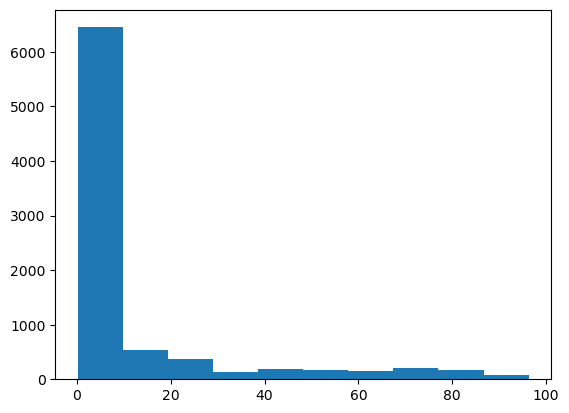

In [47]:
import matplotlib.pyplot as plt
plt.hist(data["Adj Close"])
plt.show()

# Q10: Create my own question and answer it 
    Create a plot that shows highs and lows 
    

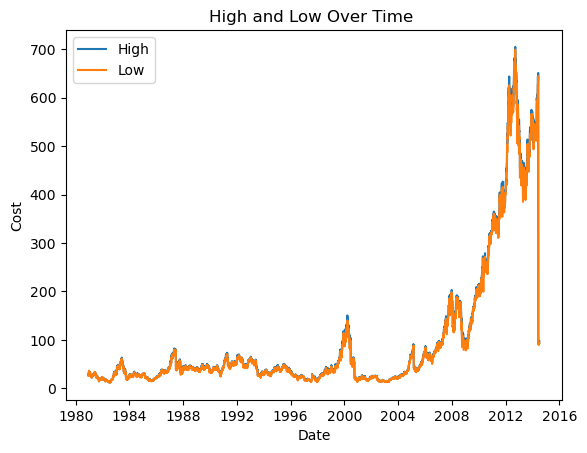

In [48]:
plt.plot(data['Date'], data['High'], label='High')
plt.plot(data['Date'], data['Low'], label='Low')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.title('High and Low Over Time ')
plt.legend()
plt.show()